## Free-space transfer function for some propagation distance near a wavelength.


For this problem, we will consider a scalar wave field which may be interpreted as one componen of E-field with the time variation removed. Lets say that scalar field has the complex amplitude $u$ and is related to the electic field via

$$
E_x(x, y, z, t) = u(x, y, z)e^{-2\pi i \nu t}
$$

The complex amplitude obeys the wave equation. We use the source-driven form of he wave equations

$$
(\Delta^2 + k^2)u(x, y, z) = s(x, y, z)
$$
where $k$ is the magnitude of the wave vector.

In free-space, all waves satisfy the Helmholtz equation

$$
(\Delta^2 + k^2) u(x, y, z) = 0
$$


### Pinhole waves
The pinhole wave is one that propagates from a pinhole in an opaque plane. At that plane it is a delta function. One way to arrive its form is to start with the incorrect guess that the wave we seek is spherical. However, as this is incorrect, we see that the spherical wabe is non-zero everywhere including the entire pinhole plane. We noice that that the spherical wavefront are oriented so that there is no phase variations in the z-direction at the plane except at the center of the wave. We might try to use 

$$
\cfrac{\partial}{\partial z} u_s (x, y, z)
$$

because it has the desired property of being zero except at the point over the plane. However, there are two more conditions that must be satisfied: normalization and the wave equation. 
Normalization yields:

$$
u_{ph} = -\cfrac{1}{2\pi}\cfrac{\partial}{\partial z} u_s(x, y, z) = -\cfrac{1}{2\pi} \bigg(ik - \cfrac{1}{r} \bigg) \cfrac{e^{ikr}}{r}\cfrac{z}{r}
$$

and wave equation is satisfied by substitution to the Helmholtz equation

$$
(\Delta^2 + k^2)u_{ph}(x, y, z) = (\Delta^2 + k^2)\bigg(-\cfrac{1}{2\pi}\cfrac{\partial}{\partial z} u_s(x, y, z) \bigg) = -\cfrac{1}{2\pi}\cfrac{\partial}{\partial z} [ (\Delta^2 + k^2)u_s(x, y, z)]
$$

### Wave Propagation
Lets begin with a scalar field in the plane $z  = z_0$, i.e. $u(x, y, z_0)$. We look at how a single point in the first plane propagates to the second plane. A single point in the plane $z  = z_0$ gives rise to a pinhole wave centered at that point and with the strength of that point. Mathematically, the wave field at the plane $z=z_1$ due to the single point in the first plane located at $(x_0, y_0)$ is 

$$
u(x, y, z_1) = u(x_0, y_0, z_0)u_{ph}(x - x_0, y-y_0, z_1 - z_0)
$$

Summing up the contribution from all the points, 

$$
u(x, y, z_1) =\int_{-\infty}^{\infty}\int_{-\infty}^{\infty} u(x_0, y_0, z_0)u_{ph}(x - x_0, y-y_0, z_1 - z_0)dx_0dy_0
$$

However, it is easy to work in $\textbf{Fourier Space}$. In Fourier Space, a convolution is transformed to a product:
1𝜆2
$$
U(\xi, \eta, z_1) = U(\xi, \eta, z_0)U_{ph}(\xi, \eta, z_1 - z_0)
$$

whee $U(\xi, \eta, z)$ is the 2D Fourier transform of the wave field at the plane $z$ and with 
$$
U_{ph}(\xi, \eta, z_1 - z_0) = \exp\Bigg( 2\pi i (z_1 - z_0) \sqrt{\frac{1}{\lambda^2} - (\xi^2 + \eta^2)} \Bigg)
$$

### The Transfer Function in Free Space

As we mostly deal with the coherent systems, we will talk about coherent transfer function or CTF. 

$$
U_{out}(\xi, \eta) = CTF(\xi, \eta)U_{in}(\xi, \eta)
$$

As we see for the wave propagation between parallel planes, the Fourier trasnform of the pinhole wave is the CTF. It is sometimes refer to as transfer function of the free space.

$$
CTF(\xi, \eta) = U_{ph}(\xi, \eta, z_1 - z_0)
$$

Another point to note that the CTF is the Fourier transform of the point spread function (PSF). The pinhole wave itself is the PSF:

$$
PSF(x, y) = u_{ph}(x, y, z_1 - z_0)
$$

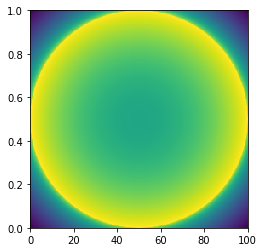

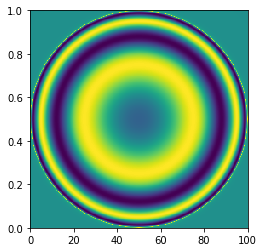

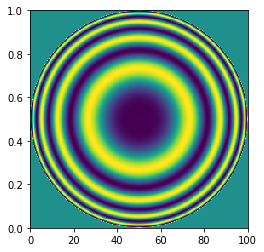

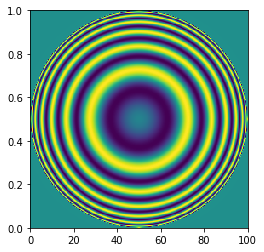

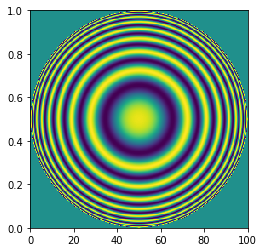

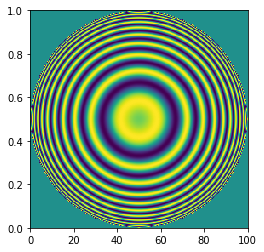

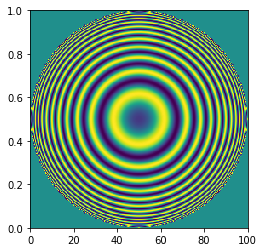

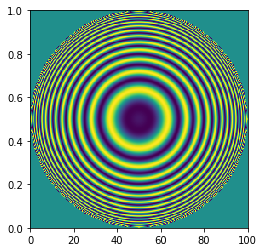

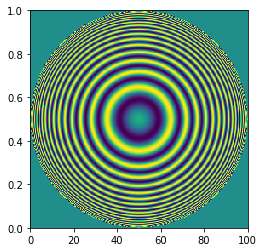

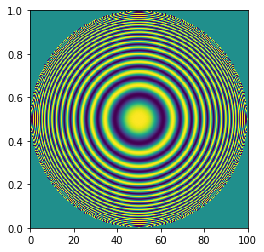

In [52]:
import numpy as np
import cmath
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
z = np.array([1, 1.5, 2, 4, 8, 16],dtype=np.complex128)
pi =3.14159265359

sampling_size = 2**8 #Sampling Size
wavelength = 700e-9 #700 nm
z_0 = 0*wavelength #Initial plane
xi = np.linspace(-1/wavelength, +1/wavelength, sampling_size, dtype=np.complex128) #xi frequency domain sampling
eta = xi #eta frequency
del_eta = eta[1] - eta[0]
del_xi = del_eta
[XI, ETA] = np.meshgrid(xi, eta)

n = np.linspace(0.1,20, 10)
for i in n:
    z_1 = i*wavelength #some propagation distance z_1
    uph = np.exp(2*np.pi*1.j*(z_1-z_0)*np.sqrt(1/(wavelength**2) - (XI**2 + ETA**2)))
    plt.imshow(np.real(uph),extent=[0,100,0,1],aspect=100)
    time.sleep(0.001)
    plt.show()

##  Wave Propagation: 

### Generate 2D Object in MATLAB and use the transfer function of free space to propagate the object. Make the object small with sub-wavelength size structure. Propagate the wave distance on the order of a wavelength. Be sure to explain how you are scaling the wave in physical dimensions. Describe the behavior of the object wave.

The object create is a rect in 2D space and serves as an aperture $U$. The dimensions are $10\mu m \times 5 \mu m$. By using the transfer function we $U_{out} = U*U_{ph}$.

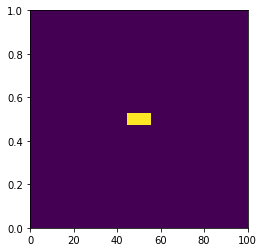

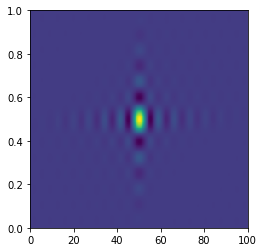

In [43]:
sampling_size = 2**8 #Sampling Size
wavelength = 700e-9 #700 nm
z_0 = 0*wavelength #Initial plane
xi = np.linspace(-1/wavelength, +1/wavelength, sampling_size, dtype=np.complex128) #xi frequency domain sampling
eta = xi #eta frequency
del_eta = eta[1] - eta[0]
del_xi = del_eta
[XI, ETA] = np.meshgrid(xi, eta) # 2D Plane, Frequency Domain

x = np.linspace(-1/(2*del_xi), 1/(2*del_xi), sampling_size, dtype = np.complex128) # sampling in spatial domain
y = x 
[X, Y] = np.meshgrid(x, y) # 2D Plane, spatial domain


#Now generate a rect object
z = (abs(X) <=50e-7)*(abs(Y)<=25e-7)

plt.imshow(np.real(z),extent=[0,100,0,1],aspect=100)
plt.show()

#Do the fft of the object
U = np.fft.fftshift(del_xi*np.fft.fft2(np.fft.fftshift(z)))
plt.imshow(np.real(U),extent=[0,100,0,1],aspect=100)
plt.show()



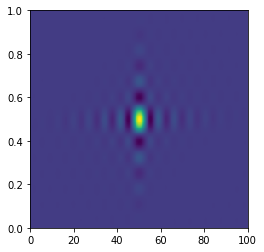

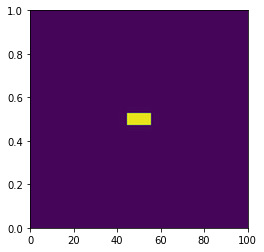

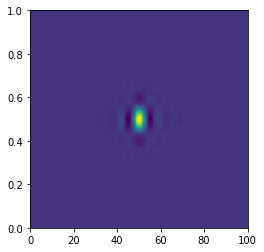

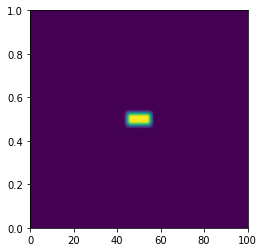

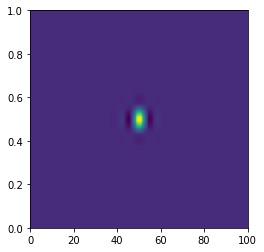

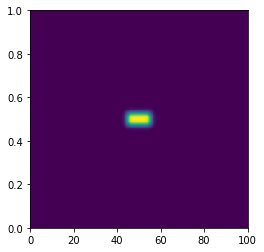

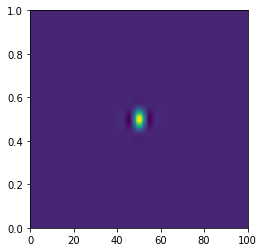

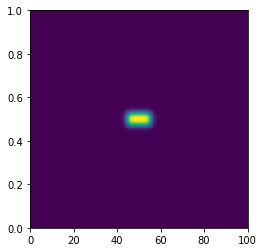

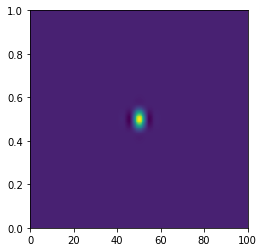

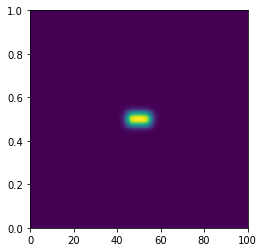

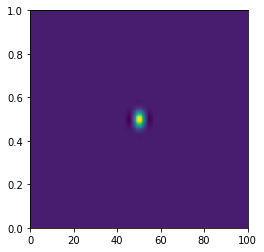

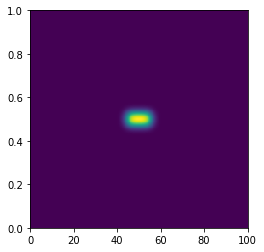

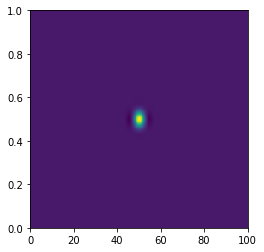

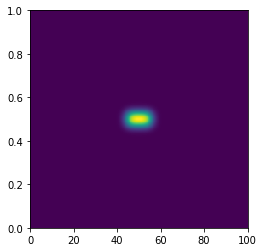

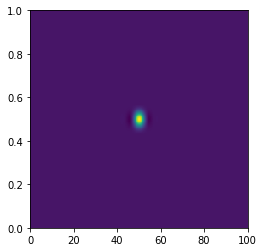

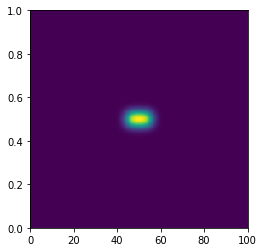

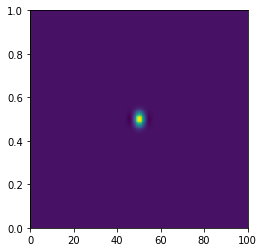

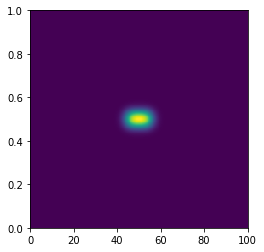

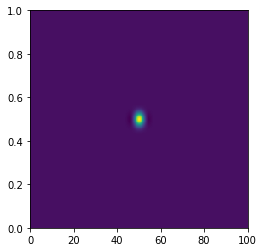

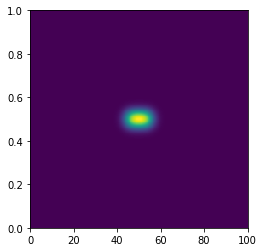

In [44]:

## Now we propagate the wave through the object
n = np.linspace(0.1,60, 10)
for i in n:
    z_1 = i*wavelength #some propagation distance z_1
    Uph = np.exp(2*np.pi*(z_1 - z_0)*np.sqrt(1/(wavelength**2)  - (XI**2 + ETA**2)))
    Uz1 = U*Uph
    plt.imshow(np.real(Uz1),extent=[0,100,0,1],aspect=100)
    plt.show()
    
    ObjectBack = np.fft.fftshift(del_xi*np.fft.ifft2(np.fft.fftshift(Uz1)))
    plt.imshow(np.real(ObjectBack),extent=[0,100,0,1],aspect=100)
    plt.show()


## Display the real part of the transfer function of free space in the parabolic approximation and compare it with the exact form.

We can write the equation 

$$
u_{ph} = -\cfrac{1}{2\pi}\cfrac{\partial}{\partial z} u_s(x, y, z) = -\cfrac{1}{2\pi} \bigg(ik - \cfrac{1}{r} \bigg) \cfrac{e^{ikr}}{r}\cfrac{z}{r}
$$

in its approximate form as

$$
u_{ph}(x, y, z) \approx -\cfrac{1}{2\pi} ik \cfrac{\exp(ikr)}{r}\cfrac{z}{r}
$$

where $r$ is $\sqrt{(x-x_0)^2 + (y-y_0)^2 + z^2} \approx z + \cfrac{(x-x_0)^2 + (y- y_0)^2}{2z}$ where $(x_0, y_0)$ are coordinates on $z = 0$ plane.

Thus, the parabolic apprximation of the pinhole wave is given by 

$$
u_{ph}(x, y, z) = \cfrac{exp(ikz)}{i\lambda z} \exp\Bigg( \cfrac{ik}{2z}[(x-x_0)^2 + (y- y_0)^2] \Bigg)
$$

The convolution nature of the equation for the wave field amplitude at z suggestes that we look at this problem in the spatial-frequency domain. That perspective involves the Fourier transform of the parabolic approximation of the pinhole wave $u_{ph}(x, y, z)$. The resultant transfer function is

$$
H(\xi, \eta) = e^{ikz}e^{-i\pi \lambda z (\xi^2 + \eta^2)}
$$

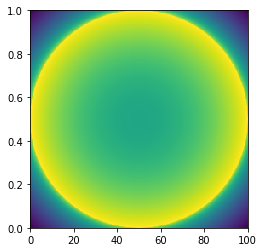

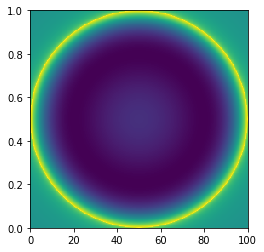

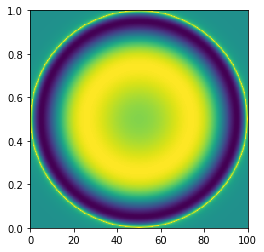

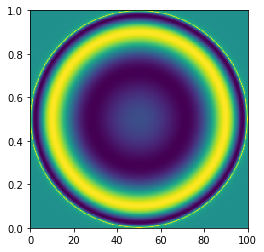

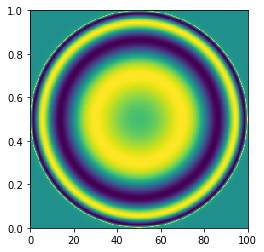

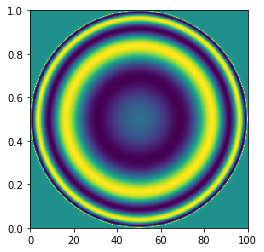

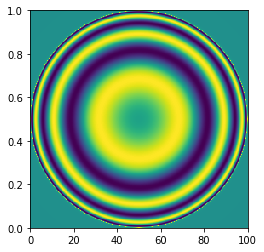

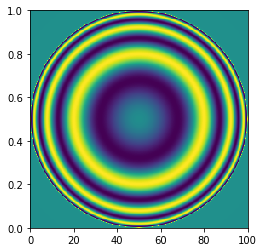

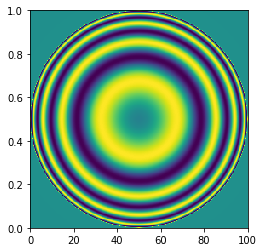

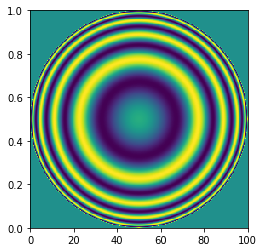

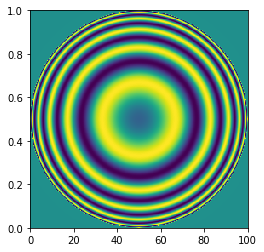

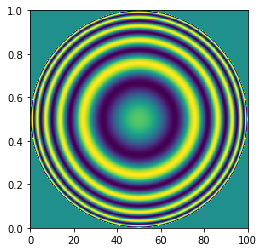

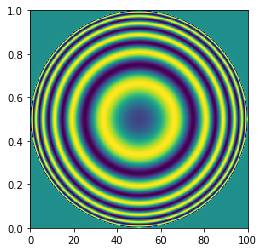

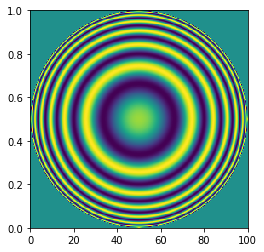

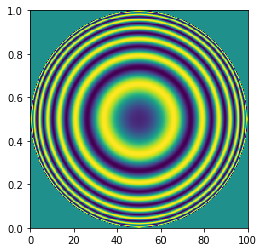

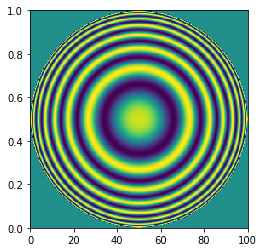

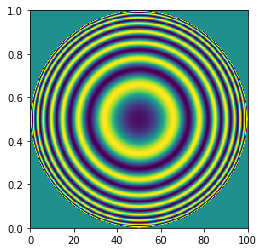

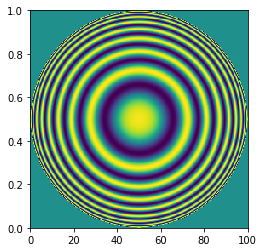

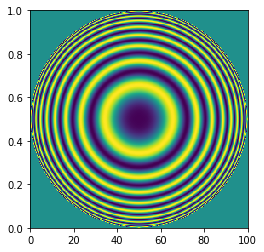

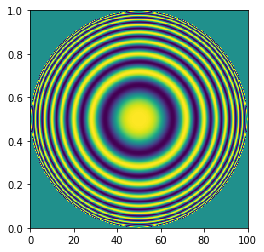

In [50]:
n = np.linspace(0.1,10, 20)
for i in n:
    z_1 = i*wavelength #some propagation distance z_1
    Uph = np.exp(2*np.pi*1.j*(z_1 - z_0)*np.sqrt(1/(wavelength**2)  - (XI**2 + ETA**2)))
    plt.imshow(np.real(Uph),extent=[0,100,0,1],aspect=100)
    plt.show()


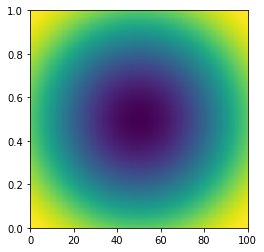

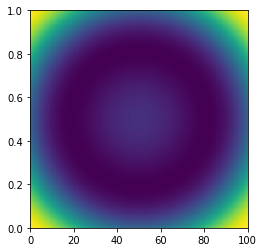

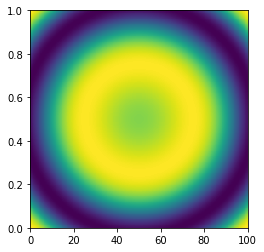

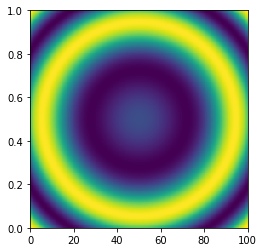

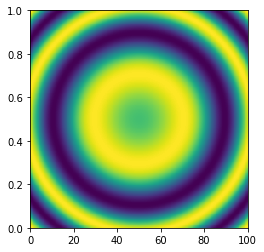

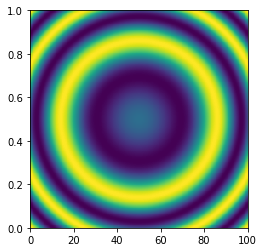

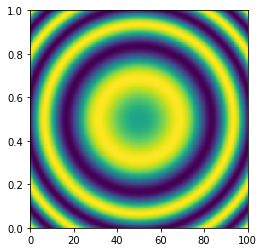

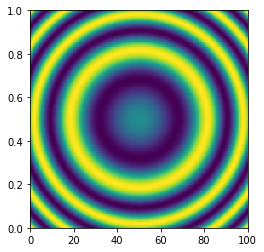

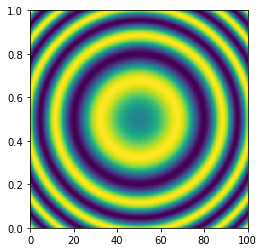

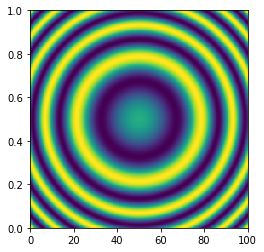

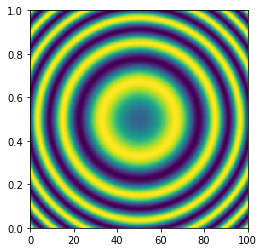

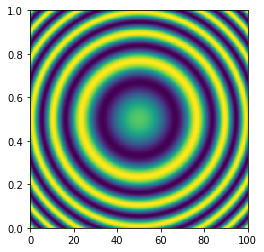

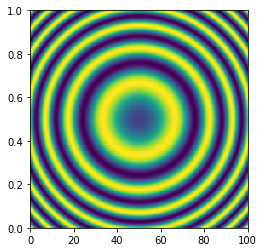

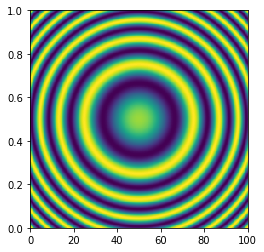

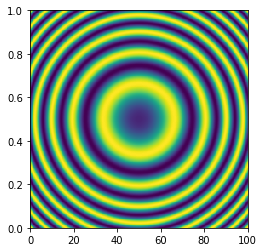

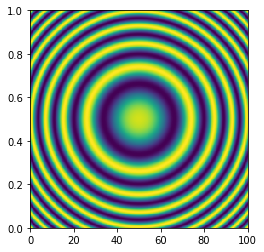

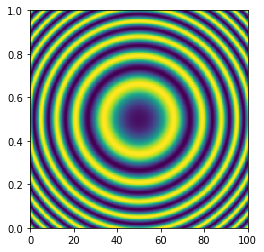

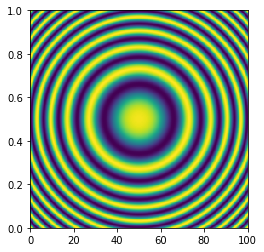

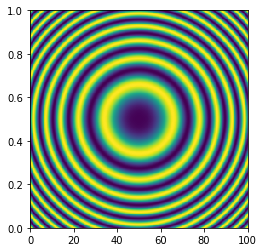

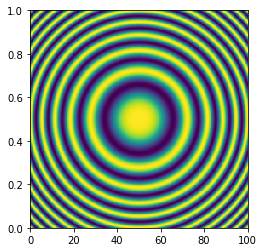

In [51]:
n = np.linspace(0.1,10, 20)
k = 2*np.pi/wavelength
for i in n:
    z_1 = i*wavelength #some propagation distance z_1
    Uph = np.exp(1.j*z_1*k)*np.exp(-1.j*np.pi*wavelength*z_1*(XI**2 + ETA**2))
    plt.imshow(np.real(Uph),extent=[0,100,0,1],aspect=100)
    plt.show()

Because the term in the square root is the therm that defines when the evanescent waves appear, using the approximation does not cause the wave to stop. 